<a href="https://colab.research.google.com/github/Navneet2409/bike-sharing-demand-prediction/blob/main/Bike_Sharing_Notebook_Navneet_Keshri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


## **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

A growing number of metropolitan areas are now offering bike rentals as a means of enhancing mobility convenience. The public must have access to the rental bike at the appropriate time so that it reduces the amount of time people have to wait. Providing the city with a consistent supply of rental bikes becomes a major concern at some point. The most important part is the expected hourly bicycle count for the constant supply of rental bicycles.


The membership, rental, and bike return procedures in a city are all automated by a network of locations in bike-sharing systems. Through these Bike Sharing systems, individuals can rent bikes from one location and return them to another or the same location as needed. A bicycle can be rented out to individuals through membership or upon request. This procedure is overseen by a citywide network of automated stores.


In this dataset, we predict the demand for the Bike Sharing Program in Seoul based on historical usage patterns about temperature, time, and other data.

## **Motivation** : -  

Predicting how many bikes will be needed at any given time and day is one of the most important business issues. Having fewer bikes wastes resources (both in terms of bike maintenance and the land/bike stand required for parking and security), while having more bikes results in revenue loss—ranging from a short-term loss due to the loss of immediate customers to a potential longer-term loss due to the loss of future customer base. Therefore, these businesses would be able to function effectively if they had an estimate of the demands.

## ***Let's Begin !***

## ***1. Know Your Data***

#### Import Libraries

In [1]:
# Import Libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

#### Dataset Loading

In [2]:
# let's mount the google drive first
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load the Seol bike data set from the drive
bike_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Docs/Bike Sharing Demand Prediction - Navneet Keshri/SeoulBikeData.csv',encoding ='latin')

#### Dataset First View

In [4]:
# Viewing the top 5 rows to take a glimpse of the data
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#### Dataset Rows & Columns Count

In [5]:
# Dataset Rows & Columns 
bike_df.shape

(8760, 14)

#### Dataset Information

In [6]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We have 14 columns. most of them are numerical except Seasons, Holiday, Functioning Days, and Date

We have to convert the Date column into the DateTime datatype.

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(bike_df[bike_df.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(bike_df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


From the above command, we noticed that every column has 0 number of rows null values. This seems to be clean data and there is no missing data in any of the 'rows and columns'.

#### What did you know about your dataset?

The aforementioned dataset has 14 columns and 8760 rows. The dataset does not contain any duplicate or missing values.

We must forecast the demand for bike-sharing using the provided dataset, which comes from the market for bike-sharing services.

Analytical studies on the likelihood of a customer seeking bike sharing are known as demand prediction. The objective is to comprehend and manage demand and supply equilibrium throughout the day.


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# Dataset Describe
bike_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


####  Variables Description

The dataset contains weather information (Temperature, Humidity, Windspeed, 
Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), 
the number of bikes rented per hour and date information.

<b>Attribute Information: </b>

* **Date :**year-month-day
* **Rented Bike count :**Count of bikes rented at each hour
* **Hour :**Hour of the day
* **Temperature :**Temperature in Celsius
* **Humidity :**%
* **Windspeed :**m/s
* **Visibility :**10m
* **Dew point temperature :**Celsius
* **Solar radiation :**MJ/m2
* **Rainfall :**mm
* **Snowfall :**cm
* **Seasons :**Winter, Spring, Summer, Autumn
* **Holiday :**Holiday/No holiday
* **Functional Day :**NoFunc(Non Functional Hours), Fun(Functional hours)

#### Check Unique Values for each variable.

In [11]:
# print the unique value
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [12]:
# Check Unique Values for each variable.
for i in bike_df.columns.tolist():
  print("No. of unique values in ",i,"is",bike_df[i].nunique())

No. of unique values in  Date is 365
No. of unique values in  Rented Bike Count is 2166
No. of unique values in  Hour is 24
No. of unique values in  Temperature(°C) is 546
No. of unique values in  Humidity(%) is 90
No. of unique values in  Wind speed (m/s) is 65
No. of unique values in  Visibility (10m) is 1789
No. of unique values in  Dew point temperature(°C) is 556
No. of unique values in  Solar Radiation (MJ/m2) is 345
No. of unique values in  Rainfall(mm) is 61
No. of unique values in  Snowfall (cm) is 51
No. of unique values in  Seasons is 4
No. of unique values in  Holiday is 2
No. of unique values in  Functioning Day is 2


##***3. Data Wrangling***

#### Changing column names of complex columns

In [13]:
# Renaming complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'rented_bike_count',
                                'Date':'date',
                                'Hour':'hour',
                                'Seasons':'seasons',
                                'Holiday':'holiday',
                                'Temperature(°C)':'temperature',
                                'Humidity(%)':'humidity',
                                'Wind speed (m/s)':'wind_speed',
                                'Visibility (10m)':'visibility',
                                'Dew point temperature(°C)':'dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'solar_radiation',
                                'Rainfall(mm)':'rainfall',
                                'Snowfall (cm)':'snowfall',
                                'Functioning Day':'functioning_day'})

#### Missing values

**Why is it necessary to deal with missing values**

There are frequently a lot of missing values in the actual data. Data corruption or failure to record data are potential causes of missing values. During the preprocessing of the dataset, the handling of missing data is very important because many machine learning algorithms do not support missing values. Because of this, we first check for missing values.

In [14]:
# check for a count of missing values in each column.
bike_df.isna().sum()
bike_df.isnull().sum()

date                     0
rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning_day          0
dtype: int64

Fortunately, there are no missing values present.

#### Duplicate values

**What is the significance of eliminating duplicate records from my data?**

The mere presence of repeated data in the dataset is referred to as "duplication." This could be caused by incorrect data entry or data collection procedures. We can save time and money by not sending the same data to the machine learning model multiple times by removing duplicate data from our set.

In [15]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


After counting the missing and duplicate values in the above data, we discovered that none is present.

#### Breaking date column

The "Date" column is read by Python as a string because it is an object type. We must convert the date column into DateTime format and then divide it into three category data types, "year," "month," and "day," because the date column is very important for analyzing user behavior.

In [16]:
# Changing the "Date" column into three "year", "month", and "day" columns
bike_df['date'] = bike_df['date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [17]:
bike_df['year'] = bike_df['date'].dt.year
bike_df['month'] = bike_df['date'].dt.month
bike_df['day'] = bike_df['date'].dt.day_name()

#### Creating a new column weekend (Saturday/Sunday=1, Other day=0)

In [18]:
# From these column we need weekends
#creating a new column of "weekend" and drop the column "Date","day","year"
bike_df['weekend'] = bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['date','day','year'],axis=1)

#### Categorical data conversion

In [19]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rented_bike_count      8760 non-null   int64  
 1   hour                   8760 non-null   int64  
 2   temperature            8760 non-null   float64
 3   humidity               8760 non-null   int64  
 4   wind_speed             8760 non-null   float64
 5   visibility             8760 non-null   int64  
 6   dew_point_temperature  8760 non-null   float64
 7   solar_radiation        8760 non-null   float64
 8   rainfall               8760 non-null   float64
 9   snowfall               8760 non-null   float64
 10  seasons                8760 non-null   object 
 11  holiday                8760 non-null   object 
 12  functioning_day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekend                8760 non-null   int64  
dtypes: f

Although they appear to be of the integer type, the "Hour," "Month," and "Weekend" columns are actually of the category type. As a result, if we do not alter this data structure, we run the risk of being deceived by the values during subsequent analyses.

In [20]:
# Change the int64 column into catagory column
cols=['hour','seasons','holiday','functioning_day','month','weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [21]:
# let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   rented_bike_count      8760 non-null   int64   
 1   hour                   8760 non-null   category
 2   temperature            8760 non-null   float64 
 3   humidity               8760 non-null   int64   
 4   wind_speed             8760 non-null   float64 
 5   visibility             8760 non-null   int64   
 6   dew_point_temperature  8760 non-null   float64 
 7   solar_radiation        8760 non-null   float64 
 8   rainfall               8760 non-null   float64 
 9   snowfall               8760 non-null   float64 
 10  seasons                8760 non-null   category
 11  holiday                8760 non-null   category
 12  functioning_day        8760 non-null   category
 13  month                  8760 non-null   category
 14  weekend                8760 non-null   c

#### Manipulations done and insights found

* We did some basic data manipulations and renamed complex column names. 
* We checked for missing and duplicate values.
* We extracted and created 3 columns from the date which are year, month, and day. 
* From the day column, we created the weekend column to better understand the weekend demand of bike sharing count.
* We also changed the data type of the variables and converted a few variables into categorical columns which are necessary for the model to understand. We have to map them into an integer so that we can pass them into our model which we will do later.
* We will get a clear view of the bike-sharing demand through graphical representations in the next sections


## **4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

Since "Rental Bike Count" is our dependent variable, we need to use a visualization plot to compare this column to the other columns. Before moving on to the numerical data type, we first examine the category data type.

Let us see how 'Rented Bike Count' = number of bikes rented varies across the various categorical data (temperature, season, holiday etc.)

#### **Chart 1 - Dist Chart on Dependant Variable i.e., rented_bike_count (Univariate Analysis)**

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: rented_bike_count, Length: 2166, dtype: int64
 


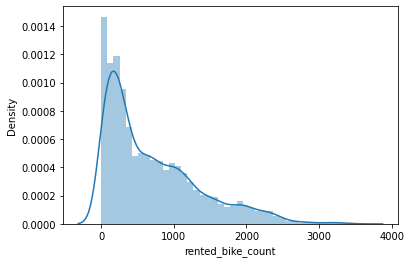

In [22]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(bike_df.rented_bike_count.value_counts())
print(" ")
# Dependant Variable Column Visualization
sns.distplot(bike_df['rented_bike_count'])

##### 1. Why did you pick the specific chart?

The distplot shows the data distribution of a variable in comparison to the density distribution, or the univariate data distribution. With the data variable as an argument, the Seaborn distplot() function returns a density distribution plot.

Because rented_bike_count is a continuous numerical variable, a distribution plot is more crucial for comprehending how the dependent variable is distributed.

##### 2. What is/are the insight(s) found from the chart?

rented_bike_count is positively skewed in the distribution with mean, median and mode at around 300

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Bike-sharing systems are a way to rent bikes where all of the city's membership, rental, and bike return processes are automated. Through these systems, individuals can rent bikes from one location and return them to another as needed.

The distribution plot of the rented_bike_count is positively skewed when compared, which provides insight into the average rented_bike_count.

From a business perspective, we must manage this possibility to match supply and demand, and when demand is high, we must list more bikes for variables to meet demand.

#### <b> Chart 2 - Rented Bike Count Vs Seasons (Bivariate Analysis)</b>


[Text(0, 0.5, 'rented_bike_count'),
 Text(0.5, 0, 'seasons'),
 Text(0.5, 1.0, 'Average bike rentals across Seasons')]

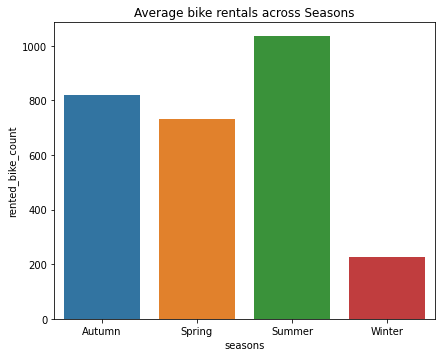

In [23]:
# Chart - 2 visualization code
# Dependant Column Value Vs seasons
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
group_season = bike_df.groupby(['seasons'])['rented_bike_count'].mean().reset_index()
ax = sns.barplot(data=group_season, x='seasons', y='rented_bike_count', ax=axes)
ax.set(xlabel='seasons', ylabel='rented_bike_count', title='Average bike rentals across Seasons')

#####Checking for outliers on Season column

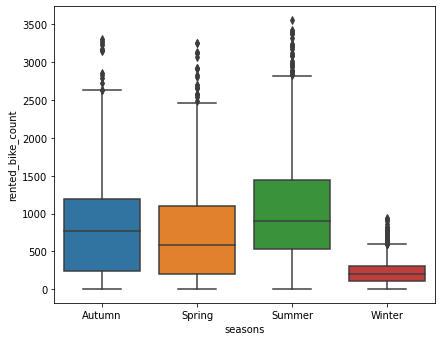

In [24]:
# Checking outliers in the box plot
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
sns.boxplot(data=bike_df, y='rented_bike_count', x='seasons')

##### 1. Why did you pick the specific chart?

To analyze the seasons column, I have chosen two charts: a box plot and a bar chart.

The frequency counts of values at various levels of a categorical or nominal variable are depicted in bar charts. Other statistics, such as percentages, are sometimes displayed in bar charts.

I used a bar chart to show the average number of rented_bike_count by season.
I used a box plot to check the outliers in this column about rented_bike_count.

##### 2. What is/are the insight(s) found from the chart?

The most preferred season for the rented_bike_count is summer and the least preferred is winter which means that people prefer to rent bikes in warm temperatures.

Bike reservations are lesser in the Spring season compared to Summer and Autumn.
Lots of outlier points for particular seasons. This is most likely due to variable distribution across the day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In terms of the number of rented bikes, this insight is helpful, and owners must manage demand in accordance with requirements. The management of supply and demand can benefit from this information.

#### <b>Chart 3 - Rented Bike Count Vs Functioning Day (Bivariate Analysis)
</b>

[Text(0, 0.5, 'rented_bike_count'),
 Text(0.5, 0, 'functioning_day'),
 Text(0.5, 1.0, 'Average bike rentals across Functioning Day')]

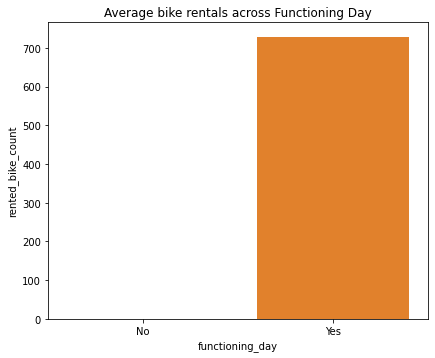

In [25]:
# Chart - 3 visualization code
# Dependant Column Value Vs functioning_day
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
group_workingday = bike_df.groupby(['functioning_day'])['rented_bike_count'].mean().reset_index()
ax = sns.barplot(data=group_workingday, x='functioning_day', y='rented_bike_count')
ax.set(xlabel='functioning_day', ylabel='rented_bike_count', title='Average bike rentals across Functioning Day')

##### Checking for outliers on Functioning Day column

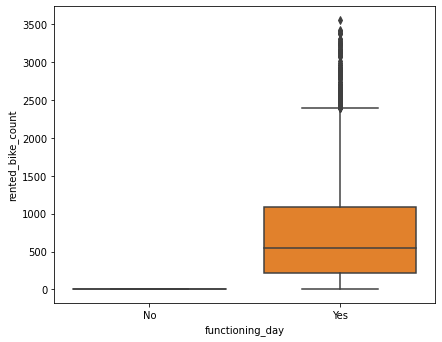

In [26]:
# Checking outliers in the box plot
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
sns.boxplot(data=bike_df, y='rented_bike_count', x='functioning_day')

##### 1. Why did you pick the specific chart?

To analyze the  functioning_day column, I have selected two charts: one is a bar chart, and the other is a box plot.

The frequency counts of values at various levels of a categorical or nominal variable are depicted in bar charts. Other statistics, such as percentages, are sometimes displayed in bar charts.

I used a bar chart to show the number of rented_bike_count by functioning_day.
I used a box plot to show the outliers in this column about rented_bike_count.

##### 2. What is/are the insight(s) found from the chart?

During business hours, there is a lot of demand for bike-sharing services, which could be because many customers use these bikes to get to work. When it is not a functioning_day, there is no demand for rented bicycles.

In the functioning_day column, there are some outliers that we need to get rid of or treat.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is yet another very insightful piece of information, as a functioning day has no demand for rented_bike_count, whereas a functioning_day has a high demand for rented bikes.

#### <b>Chart 4 - Rented Bike Count Vs Holiday (Bivariate Analysis)
</b>

[Text(0, 0.5, 'rented_bike_count'),
 Text(0.5, 0, 'holiday'),
 Text(0.5, 1.0, 'Average bike rentals across Holiday')]

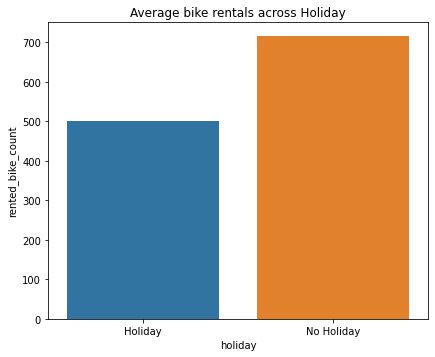

In [27]:
# Chart - 4 visualization code
# Dependant Column Value Vs holiday
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
group_holiday = bike_df.groupby(['holiday'])['rented_bike_count'].mean().reset_index()
ax = sns.barplot(data=group_holiday, x='holiday', y='rented_bike_count')
ax.set(xlabel='holiday', ylabel= 'rented_bike_count', title='Average bike rentals across Holiday')

##### Checking for outliers on Holiday Column

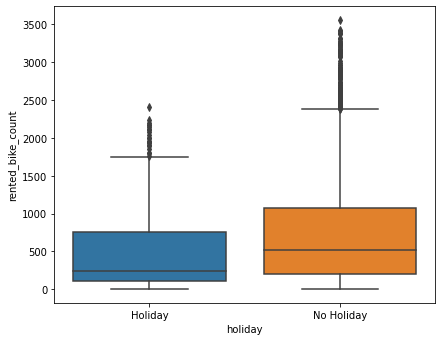

In [28]:
# Checking outliers in the box plot
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
sns.boxplot(data=bike_df, y='rented_bike_count', x='holiday')

##### 1. Why did you pick the specific chart?

For the holiday column analysis, I have chosen two charts: a box plot and a bar chart.

The frequency counts of values at various levels of a categorical or nominal variable are depicted in bar charts. Other statistics, such as percentages, are sometimes displayed in bar charts.

I used a bar chart to show the number of rented_bike_count by holiday.
To show the outliers in this section I have utilized a box plot regarding rented_bike_count.

##### 2. What is/are the insight(s) found from the chart?

When there are no holidays, demand for bike sharing is higher than when there are holidays, indicating that business-related bike rentals are preferred.

In the holiday column, there are some outliers that we need to get rid of or treat.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is yet another extremely insightful data point: if the day is not a holiday, there will be a high demand for the number of rented bikes, whereas if the day is a holiday, there will be a low demand for rented bikes.

#### <b>Chart 5 - Rented Bike Count Vs Temperature (Bivariate Analysis)

In [29]:
# group temperature column
temp_wrt_bike_rent_count = bike_df.groupby(['temperature'])['rented_bike_count'].mean().reset_index()

Text(0.5, 1.0, 'Average rented bike count wrt temperature')

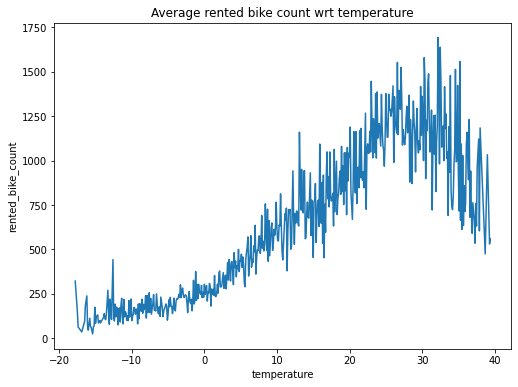

In [30]:
# Chart - 5 visualization code
# Dependant Column Value Vs temperature
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
ax = sns.lineplot(x = 'temperature', y ='rented_bike_count', data = temp_wrt_bike_rent_count)
ax.set_title('Average rented bike count wrt temperature')

##### 1. Why did you pick the specific chart?

A line chart is used to show how information has changed over time. The horizontal axis is typically a time scale; for example, minutes, seconds, days, weeks, or years.

Since temperature is a continuous variable and we must determine the optimal temperature for rented_bike_count, I've chosen a line chart to display the temperature column.

##### 2. What is/are the insight(s) found from the chart?

We can see from the line plot above that the average number of bikes rented with temperature increases steadily, with a slight decrease at the highest temperature.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This confirms once more our analysis of the seasons column, which revealed that people prefer renting bikes in warm environments. Therefore, the demand for bicycles will be high if the temperature is sufficiently warm, but extremely hot temperatures are also unsuitable for bike demand.

#### <b> Chart 6 - Hourly Rented Bike Counts Distribution (Multivariate Analysis)

##### Hourly distribution Vs rented_bike_count over holiday 

[Text(0.5, 1.0, 'Hourly Count based on Holiday or not')]

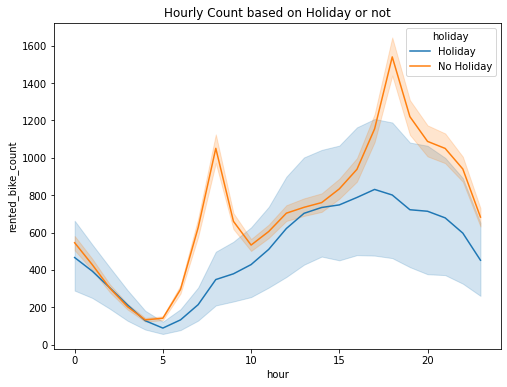

In [31]:
# Chart - 6 visualization code
# Dependant Column Value Vs hour with holiday
f, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(data=bike_df, y='rented_bike_count', x='hour', ax=axes, hue= 'holiday')
axes.set(title='Hourly Count based on Holiday or not')

##### Hourly distribution Vs rented bike count over weekend

[Text(0, 0.5, 'rented_bike_count'),
 Text(0.5, 0, 'Hour in the day'),
 Text(0.5, 1.0, 'Average Bike Rentals by the day across Weekdays and Weekends')]

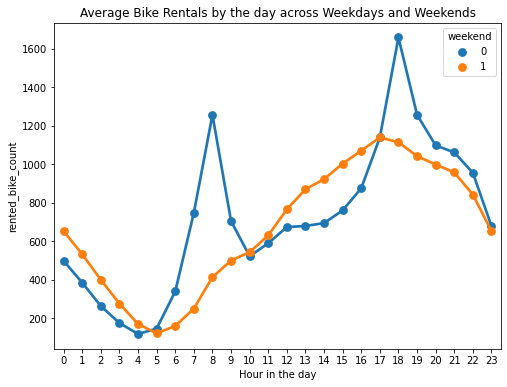

In [32]:
# Chart - 6 visualization code
# Dependant Column Value Vs hour with weekend
f, axes = plt.subplots(1, 1, figsize=(8, 6))
group_day_hour = bike_df.groupby(['weekend', 'hour'])['rented_bike_count'].mean().reset_index()
ax =sns.pointplot(data=group_day_hour, x='hour', y='rented_bike_count', hue='weekend')
ax.set(xlabel='Hour in the day', ylabel='rented_bike_count', title='Average Bike Rentals by the day across Weekdays and Weekends')

##### 1. Why did you pick the specific chart?

A line chart is used to show how information has changed over time. The horizontal axis is typically a time scale; for example, minutes, seconds, days, weeks, or years.

I've chosen two line charts to watch the hour column. Hour is a categorical variable that appears to be a numerical variable; therefore, we need to determine which hour is most popular in relation to rented_bike_count.

Additionally, I used the hue command to display the hourly distribution of rented_bike_count during holidays and weekends.

##### 2. What is/are the insight(s) found from the chart?

From the above line plot, we can see that demand for the bike is high at the business hour which is obvious as people are renting the bike for the business purposes.

* Lesser number of outliers can be seen in the seaborn box plot across hours indicating that most of the outliers are due to highly varying distribution during the day.
* Higher reservations can be seen at around 8 am and 5 pm (office hours) and close to 0 reservations very early in the morning.
* From the above plot, we can see the 2 patterns across the hours in a day in bike rentals.
* Working Day: The first pattern is where there is a peak in the rentals at around 8 am and another at around 5 pm. These correspond to working local bikers who typically go to work on the working day which is Monday to Friday.
* Non-Working Day: Second pattern where there are more or less uniform rentals across the day with a peak at around noon time. These correspond to probably tourists who typically are casual users who rent/drop off bikes uniformly during the day and tour the city on nonworking days which typically are Saturday and Sunday

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In order to better manage the demand for bike sharing, bike stores must prepare for two types of demand—demand on weekends and non-weekends.

####<b>Chart 7 - Monthly Distribution of Rented Bike Count (Multivariate Analysis)

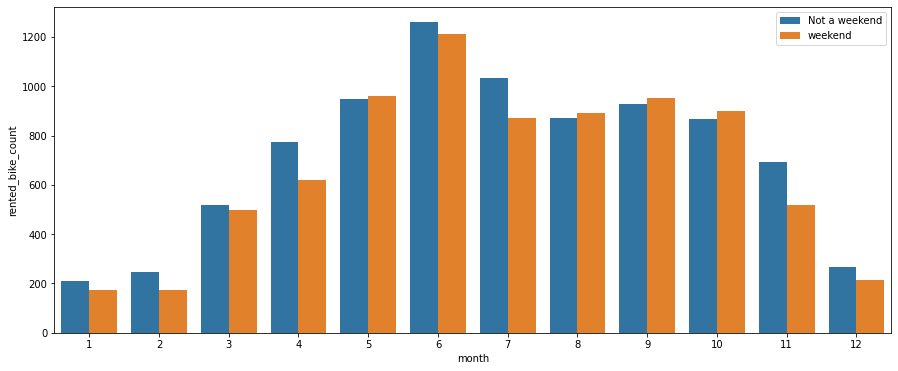

In [33]:
# Chart - 7 visualization code
# Dependant Column Value Vs month with weekend
# Average Monthly Count Distribution plot
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
group_month = bike_df.groupby(['month', 'weekend'])['rented_bike_count'].mean().reset_index()
sns.barplot(data=group_month, x='month', y='rented_bike_count', hue='weekend')
ax.set(xlabel='Month', ylabel='rented_bike_count', title='Average bike rentals per Month')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a weekend', 'weekend'])
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the recurrence counts of values for the various levels of a categorical or nominal variable. Other statistics, such as percentages, are sometimes displayed in bar charts.

I used a bar chart to display the monthly average rented bike count. To compare the distribution, I have also visualized it using a different variable this weekend.

##### 2. What is/are the insight(s) found from the chart?

From May to October, there is a lot of demand, which shows that when the weather is good, people want to use bike-sharing services more.

When compared to when it's not a weekend, demand for bike sharing is higher on weekends, indicating that business travelers prefer to rent bikes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The monthly distribution count of rented bikes enables distributors to manage demand and supply, which is good news for distributors. During the summer, demand is high.

####<b>Chart 8 - Weekend: Rented bike count Vs Hour with Temperature (Multivariate Analysis)

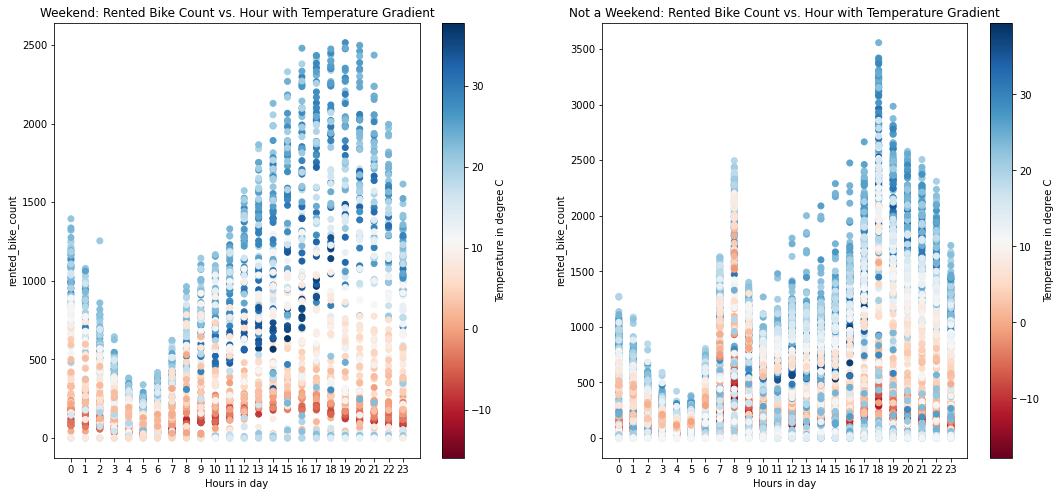

In [34]:
# Chart - 8 visualization code
# Dependant Column Value Vs hour with temperature
bike_df_w = bike_df[bike_df.weekend==1]
bike_df_nw = bike_df[bike_df.weekend==0]

fig = plt.figure(figsize=(18, 8))
# Weekend
axes = fig.add_subplot(1, 2, 1)
f = axes.scatter(bike_df_w.hour, bike_df_w['rented_bike_count'], c=bike_df_w.temperature, cmap = 'RdBu')
axes.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count', title='Weekend: Rented Bike Count vs. Hour with Temperature Gradient')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

# Not a Weekend
axes = fig.add_subplot(1, 2, 2)
f = axes.scatter(bike_df_nw.hour, bike_df_nw['rented_bike_count'], c=bike_df_nw.temperature, cmap = 'RdBu')
axes.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count', title='Not a Weekend: Rented Bike Count vs. Hour with Temperature Gradient')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot is most frequently used to illustrate the nature of the relationship between two variables. Positive or negative, non-direct or straight, as well as significant areas of strength for the powerless, the observed connections can be found.

We use a scatter plot to comprehend the relationship between various variables for a multivariate analysis.

##### 2. What is/are the insight(s) found from the chart?

As can be seen from the preceding, a greater number of people generally prefer biking in temperatures between moderate and high; However, there is a slight decrease in count if the temperature is too high (darkest of the blue dots).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Depending on the temperature and time of day, this analysis can be used for business purposes every day.

#### **Chart 9 - Rented Bike Count Vs Humidity (Bivariate Analysis)**

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'humidity'),
 Text(0.5, 1.0, 'Average bike rentals Vs Humidity')]

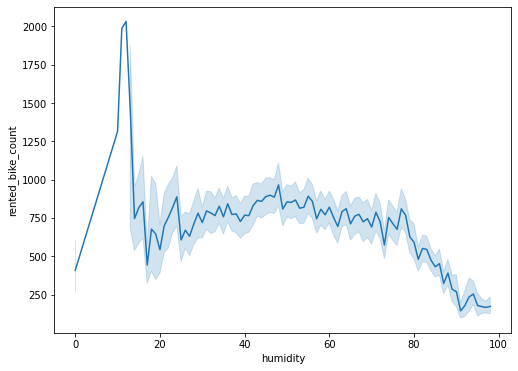

In [35]:
# Chart - 9 visualization code
# Rented Bike count vs Humidity
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_humidity = bike_df.groupby(['humidity'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data=bike_df, x='humidity', y='rented_bike_count')
ax.set(xlabel='humidity', ylabel='rented_bike_count', title='Average bike rentals Vs Humidity')


##### 1. Why did you pick the specific chart?

A line chart is used to show how information has changed over time. The horizontal axis is typically a time scale; for example, minutes, seconds, days, weeks, or years.

Due to the fact that humidity is a continuous variable and we must determine the optimal humidity in relation to rented_bike_count, I chose a line chart to monitor the humidity column.

##### 2. What is/are the insight(s) found from the chart?

We can see from the line plot above that the average number of bikes rented with humidity goes up and down sharply. For the number of rented bikes in demand, the most preferred humid environment is 0-20.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

When the humidity in the air is between 0 and 20, the distributor can increase the number of bikes that can be rented to manage demand.

####**Chart 10 - Rented Bike Count Vs Wind Speed (Bivariate Analysis)**

[Text(0.5, 17.200000000000003, 'wind_speed'),
 Text(0.5, 1.0, 'Average bike rentals Vs wind_speed')]

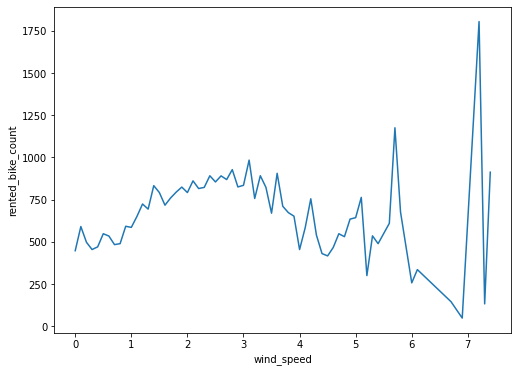

In [36]:
# Chart - 10 visualization code
# Rented Bike count vs Wind Speed
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_wind_speed = bike_df.groupby(['wind_speed'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data=group_wind_speed, x='wind_speed', y = 'rented_bike_count')
ax.set(xlabel='wind_speed', title='Average bike rentals Vs wind_speed')

##### 1. Why did you pick the specific chart?

A line chart is used to show how information has changed over time. The horizontal axis is typically a time scale; for example, minutes, seconds, days, weeks, or years.

Because wind speed is a continuous variable and we need to determine the wind speed that is most favorable to the number of rented bikes, I chose a line chart to monitor the wind_speed column.

##### 2. What is/are the insight(s) found from the chart?

We can see from the line plot above that there is no clear relationship between wind_Speed and the number of rented bikes, indicating that other variables are more important.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can take into account the wind speed if we want to, but it won't significantly affect the demand for rented bike count.

#### **Chart 11 - Rented Bike Count Vs Visibility (Bivariate Analysis)**

[Text(0.5, 17.200000000000003, 'visibility'),
 Text(0.5, 1.0, 'Average bike rentals Vs visibility')]

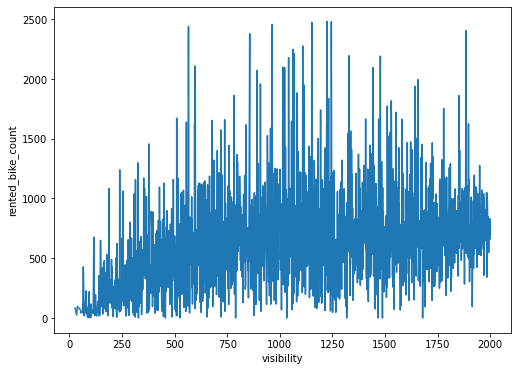

In [37]:
# Chart - 11 visualization code
# Rented Bike count vs Wind Speed
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_wind_speed = bike_df.groupby(['visibility'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data=group_wind_speed, x='visibility', y = 'rented_bike_count')
ax.set(xlabel='visibility', title='Average bike rentals Vs visibility')

##### 1. Why did you pick the specific chart?

A line chart is used to show how information has changed over time. The horizontal axis is typically a time scale; for example, minutes, seconds, days, weeks, or years.

Because visibility is a continuous variable and we must determine the preferred visibility about rented_bike_count, I have chosen a line chart to observe the visibility column.

##### 2. What is/are the insight(s) found from the chart?

We can see from the line plot above that there is no obvious relationship between visibility and rented_bike_count; however, as visibility rises, so does rented_bike_count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can take into account visibility if we want to, but it won't significantly impact the demand for rented_bike_count.

#### **Chart 12 - Rented Bike Count Vs Dew Point Temperature (Bivariate Analysis)**

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'dew_point_temperature'),
 Text(0.5, 1.0, 'Average bike rentals Vs dew_point_temperature')]

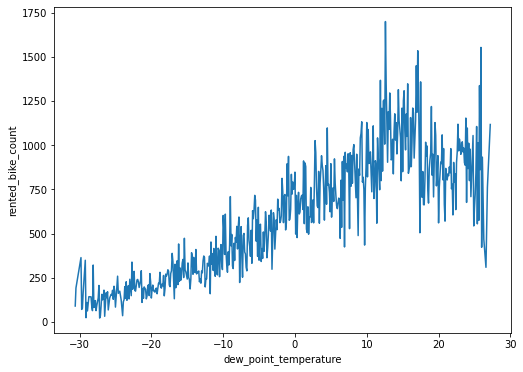

In [38]:
# Chart - 12 visualization code
# Rented Bike count vs dew_point_temperature
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_dew_point_temperature = bike_df.groupby(['dew_point_temperature'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data = group_dew_point_temperature, x ='dew_point_temperature', y = 'rented_bike_count')
ax.set(xlabel='dew_point_temperature', ylabel='rented_bike_count', title='Average bike rentals Vs dew_point_temperature')

##### 1. Why did you pick the specific chart?

A line chart is used to show how information has changed over time. The horizontal axis is typically a time scale; for example, minutes, seconds, days, weeks, or years.

Since dew_point_temperature is a continuous variable and we need to find the most preferred dew_point_temperature about rented_bike_count, I chose a line chart to observe the dew_point_temperature column.

##### 2. What is/are the insight(s) found from the chart?

We can see from the line plot above that the average number of bikes rented with temperature increases steadily, with a slight decrease at the highest temperature. The rented bike count vs. temperature chart, which demonstrates a linear relationship between temperature and dew point temperature, is very similar to this one.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We've found that renting a bike in a warm environment is more popular. Therefore, the demand for bicycles will be high if the temperature is sufficiently warm, but extremely hot temperatures are also unsuitable for bike demand.

#### **Chart 13 - Rented Bike Count Vs Solar Radiation (Bivariate Analysis)**

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'solar_radiation'),
 Text(0.5, 1.0, 'Average bike rentals Vs solar_radiation')]

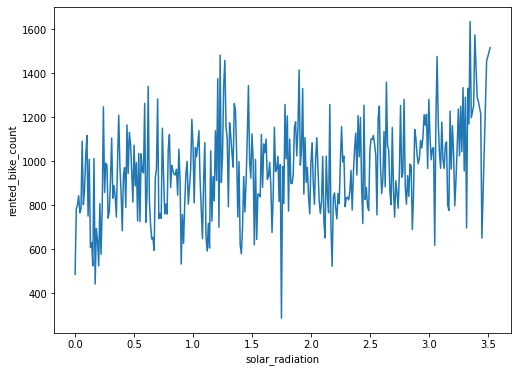

In [39]:
# Chart - 13 visualization code
# Rented Bike count vs solar_radiation
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_solar_radiation = bike_df.groupby(['solar_radiation'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data = group_solar_radiation, x ='solar_radiation', y = 'rented_bike_count')
ax.set(xlabel='solar_radiation', ylabel='rented_bike_count', title='Average bike rentals Vs solar_radiation')

##### 1. Why did you pick the specific chart?

A line chart is used to show how information has changed over time. The horizontal axis is typically a time scale; for example, minutes, seconds, days, weeks, or years.

Because solar_radiation is a continuous variable and we need to find the solar_radiation that is most preferred about rented_bike_count, I chose a line chart to observe the solar_radiation column.

##### 2. What is/are the insight(s) found from the chart?

We can see from the line plot above that the average number of bikes rented goes up with solar radiation, with short-term sharp increases and decreases. Additionally, this column is directly related to the temperature column.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We've found that renting a bike in a warm environment is more popular. Therefore, the bike will be in high demand if the temperature rises sufficiently.

#### **Chart 14 - Rented Bike Count Vs Rainfall (Bivariate Analysis)**

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'rainfall'),
 Text(0.5, 1.0, 'Average bike rentals Vs rainfall')]

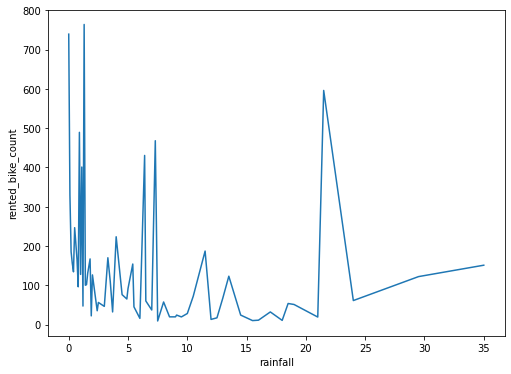

In [40]:
# Chart - 14 visualization code
# Rented Bike count vs rainfall
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_rainfall = bike_df.groupby(['rainfall'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data = group_rainfall, x ='rainfall', y = 'rented_bike_count')
ax.set(xlabel='rainfall', ylabel='rented_bike_count', title='Average bike rentals Vs rainfall')

##### 1. Why did you pick the specific chart?

A line chart is used to show how information has changed over time. The horizontal axis is typically a time scale; for example, minutes, seconds, days, weeks, or years.

Since rainfall is a continuous variable and we must determine the most preferred rainfall about rented_bike_count, I chose a line chart to display the rainfall column.

##### 2. What is/are the insight(s) found from the chart?

We can see from the line plot above that there is no apparent connection between the number of rented bikes and rainfall.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We are able to take into account the rainfall if we so choose, but it has little effect on the demand for rented_bike_count.

#### **Chart 15 - Rented Bike Count Vs Snowfall (Bivariate Analysis)**

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'snowfall'),
 Text(0.5, 1.0, 'Average bike rentals Vs snowfall')]

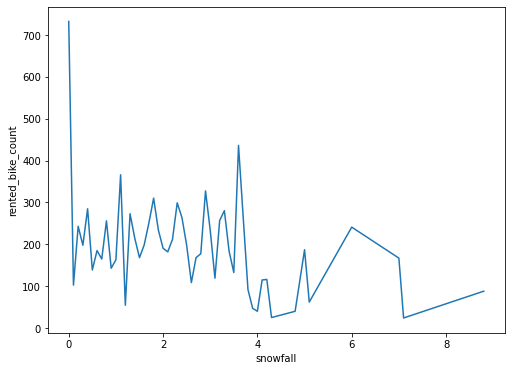

In [41]:
# Chart - 15 visualization code
# Rented Bike count vs snowfall
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_snowfall = bike_df.groupby(['snowfall'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data = group_snowfall, x ='snowfall', y = 'rented_bike_count')
ax.set(xlabel='snowfall', ylabel='rented_bike_count', title='Average bike rentals Vs snowfall')

##### 1. Why did you pick the specific chart?

A line chart is used to show how information has changed over time. The horizontal axis is typically a time scale; for example, minutes, seconds, days, weeks, or years.

Since snowfall is a continuous variable and we must determine the most preferred snowfall in relation to rented_bike_count, I chose a line chart to display the snowfall column.

##### 2. What is/are the insight(s) found from the chart?

The line plot above reveals that there is no discernible correlation between snowfall and rented_bike_count; however, on a longer time frame, we can assert that there is a decrease in bike demand associated with an increase in snowfall.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

When the weather is clear and there isn't any snow, we can say that more people want bikes.

## **5. Outlier Analysis**

#### <b> Zscore > 4 Pruning </b>
Let us first take a look at the data entries with zscore > 4, i.e., data with more than 4 standard deviation away from the mean.

In [42]:
 # Function to calculate zscore
def zscore(series): 
    return (series-series.mean())/series.std()

bike_df['count_zscore'] = bike_df.groupby(['hour', 'functioning_day'])['rented_bike_count'].transform(zscore)
outlier_idx = np.abs(bike_df['count_zscore'])>4
outlier_data = bike_df.loc[outlier_idx, :]
print('Shape of the outlier data entries: ', outlier_data.shape)
outlier_data

Shape of the outlier data entries:  (1, 16)


,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend,count_zscore
4922,1254,2,20.9,87,1.8,222,18.6,0.0,0.0,0.0,Summer,No Holiday,Yes,6,1,4.577229


Let us prune out this outliers. This could be due to some late night shows or holiday or some party.

In [43]:
# Removing outliers from my data
bike_df_without_outliers = bike_df.loc[~outlier_idx, :]
print('Shape of data before outliner pruning: ', bike_df.shape)
print('Shape of data after outlier pruning: ', bike_df_without_outliers.shape)

Shape of data before outliner pruning:  (8760, 16)
Shape of data after outlier pruning:  (8759, 16)


Dropping the Zscore >4 column from the data frame

In [44]:
# Dropping the zscore column
bike_df_without_outliers = bike_df_without_outliers.drop('count_zscore', axis=1)
bike_df_without_outliers.head(n=3)

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


#### <b> Correlation Analysis </b>
Regression Plots
* Using seaborn to get regression plots with respect to some features

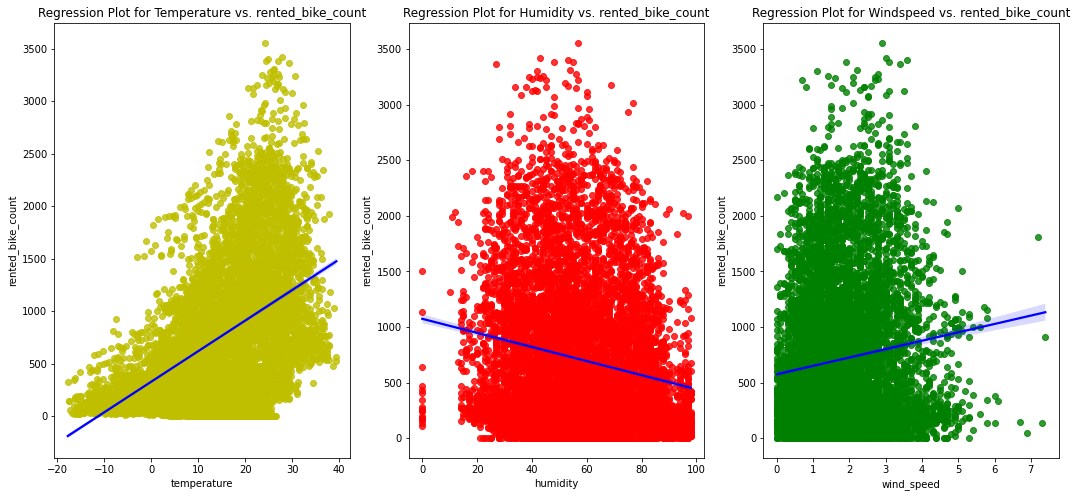

In [45]:
# Regression Plots with respect to Temperature, Humidity and Windspeed
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data =bike_df_without_outliers, x='temperature', y='rented_bike_count',ax=axes,scatter_kws={"color": 'y'}, line_kws={"color":"b"})
axes.set(title='Regression Plot for Temperature vs. rented_bike_count')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=bike_df_without_outliers, x='humidity', y='rented_bike_count',ax=axes,scatter_kws={"color": 'r'}, line_kws={"color":"b"})
axes.set(title='Regression Plot for Humidity vs. rented_bike_count')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=bike_df_without_outliers, x='wind_speed', y='rented_bike_count',ax=axes, scatter_kws={"color":'g'}, line_kws={"color":"b"})
axes.set(title='Regression Plot for Windspeed vs. rented_bike_count')
plt.show()

##### 1. Why did you pick the specific chart?

Seaborn's regression plots serve primarily as a visual guide for highlighting patterns in a dataset during exploratory data analyses. Regression plots help to illustrate the linear relationships between two parameters by drawing a regression line between them, as the name suggests.

As a result, I used regression plots to determine the relationship between wind speed, humidity, and temperature.

##### 2. What is/are the insight(s) found from the chart?

The regression plot above shows that rented_bike_count has a positive correlation with temperature and windspeed and a negative correlation with humidity. We will check the relationship of all mathematical factors with one another through Heatmap.

#### <b> Heatmap Plot </b>
Obtaining correlation between the rental of bikes and other numerical features by making use of heatmap plots of all the numerical features

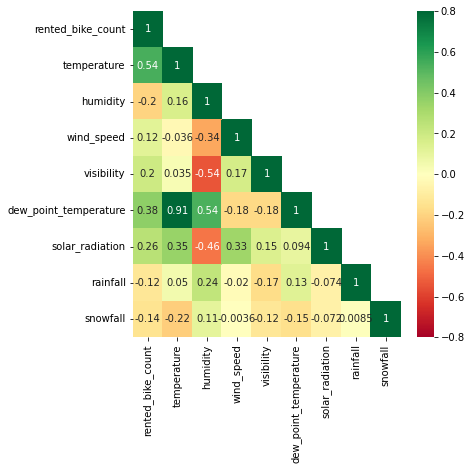

In [46]:
# Heatmap relative to all numeric columns
corr_matrix = bike_df_without_outliers.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

# Heatmap visualization
fig = plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
plt.show()

##### 1. Why did you pick the specific chart?

A heat map can be used to show density. In addition, it makes it simpler to visualize the relationship between variables and the dependent variable when conducting analysis.

I used a heatmap to determine the linear relationship between all the variables and the dependent variable.

##### 2. What is/are the insight(s) found from the chart?

* <b> Very Highly Correlated (0.7 - 0.9) : </b> temperature and dew_point_temperature are very highly correlated as expected.

* <b> Moderately Correlated (0.5 - 0.7) : </b> We see a moderate correlation between humidity and dew_point_temperature and temperature and rented_bike_count. This is probably only true for the range of temperatures provided.
* <b> Negative Correlation (less than 0) :</b> We see a negative correlation between visibility and humidity and solar_radiation and humidity. The more the humidity, the fewer people prefer to bike.
* <b> Low Correlation(near zero):</b> rented_bike_count has a weak dependence on windspeed, snowfall, and rainfall.

## **6. Feature Engineering & Data Pre-processing**

Numerous categorical columns are present. Each important and relevant categorical column will be converted into binary vector columns by us. Later, eliminate all unnecessary columns (redundant or very low correlation).

#### <b>Column transformations need to be done:</b>

* season: month column has a direct mapping with the season (Winter: January to March, Summer: April to June, Autumn: July to September, and Spring: October to December). Hence we will drop the season column.
* holiday and 'day': functioning_day = weekday and not a holiday. Since we noticed that there were two kinds of bike rental behaviors - during functioning days and not a functioning day, we will retain only the working day column and drop the 'day' and 'holiday' column
* functioning_day: After observing the bike rental trend, we propose to build 2 separate models for 1. if it is a weekend, and 2. if it is not a weekend. Hence, we can separate the data based on this column and drop the column.
* temperature: temperature and dew_point_temperature are highly correlated. Hence retain only the temperature column.
* wind speed, rainfall, and snowfall: Very poorly correlated with the count. Hence drop this column
* Date: Intuitively, there is should be no dependency on a date. Hence drop this column
* hour: Split hour column to hour_0, hour_1, ..., hour_23. Drop hour_23 since it is a function of the rest of the hour columns.
* month: Split month column to month_1, month_2, ..., month_12. Drop month_12 since it is a function of the rest of the month columns

In [47]:
# Using numbers to represent categorical data to transform the categorical columns
season_dict = {'Spring':1, 'Summer':2, 'Autumn':3, 'Winter':4}
holiday_dict ={'No Holiday':0, 'Holiday': 1}
functioning_day_dict ={'No':0, 'Yes':1}

bike_df_without_outliers['seasons'] = bike_df_without_outliers['seasons'].map(season_dict)
bike_df_without_outliers['holiday'] = bike_df_without_outliers['holiday'].map(holiday_dict)
bike_df_without_outliers['functioning_day'] = bike_df_without_outliers['functioning_day'].map(functioning_day_dict)
bike_df_without_outliers.head(3)

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1,12,0


In [48]:
bike_df_without_outliers.head(3)

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1,12,0


In [49]:
# Dropping columns from the provided data set that are either highly correlated with the existing columns: 
# season with month, holiday and day with functioning_day, temperature with dew_point_temperature
# or poorly correlated with the target column: windspeed, rainfall and snowfall

to_drop = ['seasons', 'holiday', 'dew_point_temperature', 'wind_speed', 'rainfall', 'snowfall']
bike_df_without_outliers = bike_df_without_outliers.drop(to_drop, axis=1)
bike_df_without_outliers.head(n=3)

,rented_bike_count,hour,temperature,humidity,visibility,solar_radiation,functioning_day,month,weekend
0,254,0,-5.2,37,2000,0.0,1,12,0
1,204,1,-5.5,38,2000,0.0,1,12,0
2,173,2,-6.0,39,2000,0.0,1,12,0


####**Categorical Encoding - Transforming all the categorical columns into binary columns...**

In [50]:
# Transforming all the categorical columns into binary columns
month=pd.get_dummies(bike_df_without_outliers['month'], prefix='month')
hour=pd.get_dummies(bike_df_without_outliers['hour'], prefix='hour')

bike_df_ready=pd.concat([bike_df_without_outliers, month, hour],axis=1)
bike_df_ready.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'visibility',
       'solar_radiation', 'functioning_day', 'month', 'weekend', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [51]:
bike_df_without_outliers.head(3)

,rented_bike_count,hour,temperature,humidity,visibility,solar_radiation,functioning_day,month,weekend
0,254,0,-5.2,37,2000,0.0,1,12,0
1,204,1,-5.5,38,2000,0.0,1,12,0
2,173,2,-6.0,39,2000,0.0,1,12,0


Dropping columns and the last binary vector column (which are fully correlated and can be expressed as a function of other columns)

In [52]:
# Dropping the last binary vector column 
to_drop2 = ['month_12', 'hour_23']
bike_df_ready = bike_df_ready.drop(to_drop2, axis=1)
bike_df_ready.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'visibility',
       'solar_radiation', 'functioning_day', 'month', 'weekend', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22'],
      dtype='object')

####**Normalise rented_bike_count (Dependent Variable) column**

##### Which method have you used to scale you data and why?

A fundamental component of data mining is data normalization, also known as data pre-processing. It refers to transforming the data, specifically converting the source data into a different format that makes it possible to effectively process the data. Data normalization's primary goal is to reduce or even eliminate duplicate data.

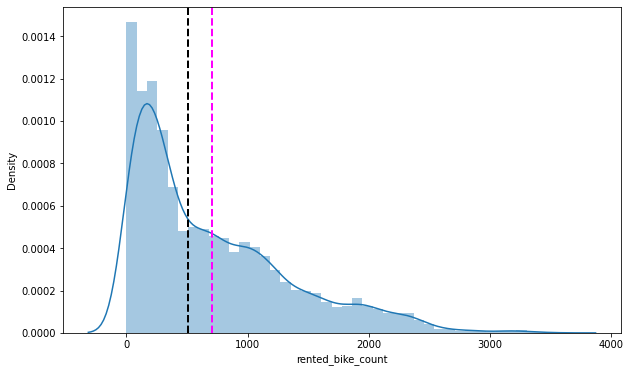

In [53]:
# Distribution plot of Rented Bike Count
# density plot
plt.figure(figsize=(10,6))
ax=sns.distplot(bike_df_ready['rented_bike_count'],hist=True)
plt.xlabel('rented_bike_count')
plt.ylabel('Density')
ax.axvline(bike_df_ready['rented_bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df_ready['rented_bike_count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

Right skewness is moderate in Rented Bike Count, as shown in the graph above. Since "the distribution of the dependent variable has to be normal" is the assumption of linear regression, we should carry out some action to make it normal.

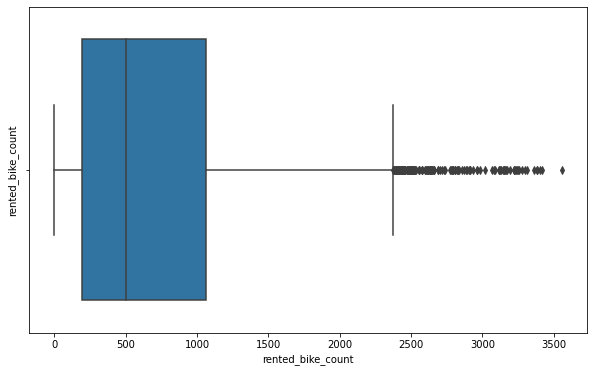

In [54]:
# Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
sns.boxplot(bike_df_ready['rented_bike_count'])
plt.ylabel('rented_bike_count')
plt.show()

The boxplot above demonstrates that outliers in the rented bike count column have been identified.

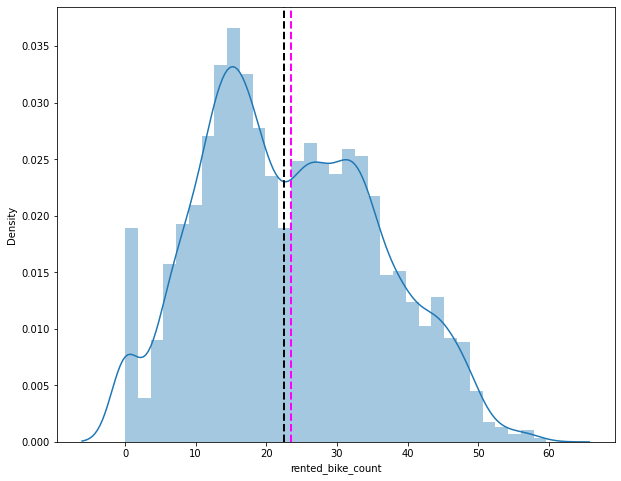

In [55]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
ax=sns.distplot(np.sqrt(bike_df_ready['rented_bike_count']))
plt.xlabel('rented_bike_count')
plt.ylabel('Density')
ax.axvline(np.sqrt(bike_df_ready['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df_ready['rented_bike_count']).median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

After applying square root to the skewed Rented Bike Count, we obtain an almost normal distribution due to the general rule that the skewed variable must be made normal.

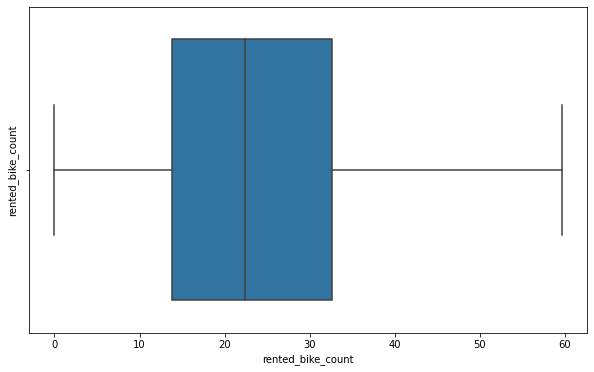

In [56]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))
sns.boxplot(x=np.sqrt(bike_df_ready['rented_bike_count']))
plt.ylabel('rented_bike_count')
plt.show()

We find that there are no outliers in the Rented Bike Count column after applying square root.

####**Data Splitting**

<b>Train/Validation/Test Split:</b>

First split the labeled data provided into internal training and testing sets. 



In [57]:
# Contains Binary Vector Form of features (Obtained from OneHotEncoder transformed categorical feature)
X = bike_df_ready.drop('rented_bike_count', axis=1)
y = np.sqrt(bike_df_ready['rented_bike_count'])

In [58]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(f'X_train shape =',X_train.shape)
print(f'X_test shape =',X_test.shape)
print(f'y_train shape =',y_train.shape)
print(f'y_test shape =',y_test.shape)

X_train shape = (6569, 42)
X_test shape = (2190, 42)
y_train shape = (6569,)
y_test shape = (2190,)


##### What data splitting ratio have you used and why? 

There are two issues at stake: Your parameter estimates exhibit greater variance with less training data. Your performance statistic will have greater variance with less testing data. In general, you should focus on dividing the data so that neither the absolute number of instances in each category nor the percentage is too high, which is more important.

If you have a sum of 100 cases, you're presumably staying with cross-approval as no single split will give you good fluctuation in your evaluations. If you have 100,000 instances, it doesn't matter if you split them 80:20 or 90:10 (although you might want to use less training data if your method requires a lot of computational power).

You might be surprised to learn that the 80/20 ratio—also known as the Pareto principle—occurs quite frequently. If you use that ratio, it is usually a safe bet.

The small training dataset in this instance necessitates a 75:25 ratio.

#### **Evaluation Metrics Used -**

* The mean squared error (MSE):- It tells you how close a regression line is to a set of points.

* Root Mean Square Error (RMSE):- It is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE):- These are metrics used to evaluate a Regression Model. ... Here, errors are the absolute differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2):- It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Adjusted R-squared:- It is a modified version of R-squared that has been adjusted for the number of predictors in the model.
​


## **7. ML Model Implementation**

#### **1st Model - Linear Regression**

By fitting a line to the data, regression models describe the relationship between variables. The line used in linear regression models is straight.

The linear approach is used to model the relationship between independent and dependent variables in linear regression. Simply put, it is a line that best fits the values of the independent and dependent variables.

Allow us now to carry out our most memorable model.
Linear Regression from the Scikit library will be used.

In [59]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [60]:
#check the score
reg.score(X_train, y_train)

0.7572206937827596

In [61]:
#check the coefficeint
reg.coef_

array([ 2.46645627e-01,  5.60119679e-01, -1.43402426e-01,  1.28750500e-03,
        1.22733903e+00,  2.90693362e+01,  7.75745501e+07, -1.24746738e+00,
        8.53320049e+08,  7.75745498e+08,  6.98170951e+08,  6.20596402e+08,
        5.43021854e+08,  4.65447305e+08,  3.87872749e+08,  3.10298196e+08,
        2.32723652e+08,  1.55149105e+08,  7.75745555e+07,  3.97469278e+00,
        1.99081268e+00, -1.04222744e+00, -3.97573113e+00, -6.14697743e+00,
       -5.93076997e+00, -1.27223078e+00,  4.93360906e+00,  1.02438739e+01,
        2.56203247e+00, -2.30238057e+00, -3.00961629e+00, -2.65221900e+00,
       -3.42162218e+00, -3.45517339e+00, -2.81340865e+00, -7.49070450e-01,
        2.62002802e+00,  9.08659345e+00,  5.72296927e+00,  5.46611530e+00,
        4.62620328e+00,  3.75181066e+00])

In [62]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [63]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 37.49870759231109
RMSE : 6.123618831402808
MAE : 4.631941930070968
R2 : 0.7572206937827596
Adjusted R2 : 0.7524714013462789


Our r2 score appears to be 0.757, indicating that our model can account for the majority of the variance in the data. Let's store it in a dataframe so that we can compare it later.

In [64]:
# storing the value of the test set metrics in a dataframe for comparing later
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),2),
       'MSE':round((MSE_lr),2),
       'RMSE':round((RMSE_lr),2),
       'R2_score':round((r2_lr),2),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [65]:
# performance on test dataset
#import the packages
from sklearn.metrics import mean_squared_error

#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 39.75328509745072
RMSE : 6.305020626251014
MAE : 4.780139380147357
R2 : 0.7462667990840166
Adjusted R2 : 0.741303224590085


The r2_score for the test set is 0.746. This indicates that our linear model works well with the test data. Let's try to visualize our residuals to see if heteroscedasticity—also known as unequal variance or scatter—is present.

In [66]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),2),
       'MSE':round((MSE_lr),2),
       'RMSE':round((RMSE_lr),2),
       'R2_score':round((r2_lr),2),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

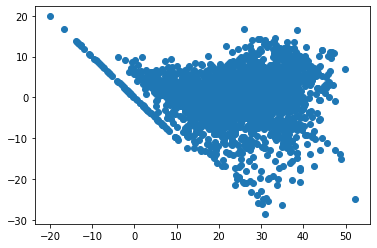

In [67]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

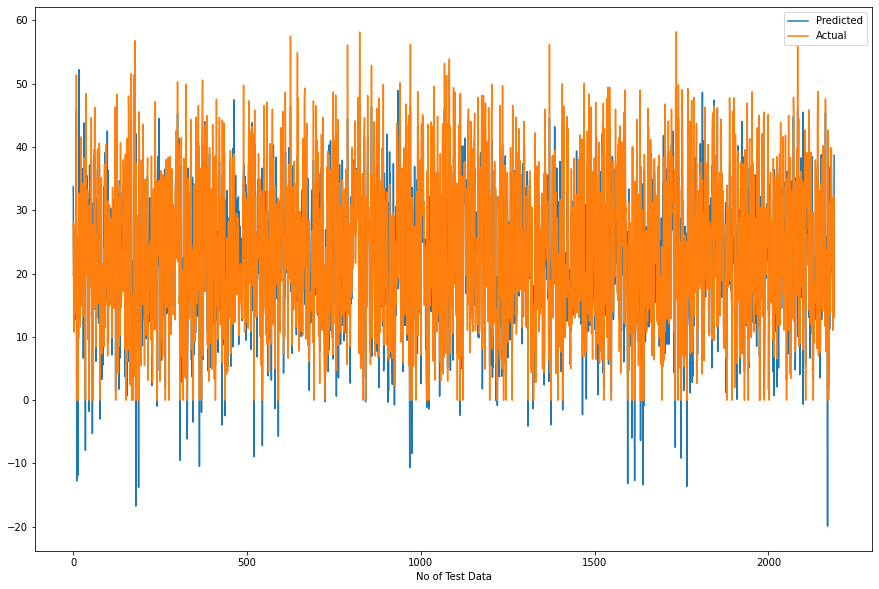

In [68]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#### **2nd Model -Lasso (Regularization Model)** 

In [69]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.4531383891444809 0.456976838882418


In [70]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [71]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 83.87315645584718
RMSE : 9.158228892959992
MAE : 6.791020865571764
R2 : 0.456976838882418
Adjusted R2 : 0.4463541221768109


Our r2 score appears to be 0.456, indicating that our model is unable to account for the majority of the variance in the data. Let's save it in a dataframe so that we can compare it later.

In [72]:
# storing the value of the test set metrics in a dataframe to compare later
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),2),
       'MSE':round((MSE_l),2),
       'RMSE':round((RMSE_l),2),
       'R2_score':round((r2_l),2),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [73]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 85.67875802894649
RMSE : 9.256282084560004
MAE : 6.944204612053192
R2 : 0.4531383891444809
Adjusted R2 : 0.44244058399500175


The test set has an R2 score of 0.45. This indicates that the test data do not support our linear model's predictions. Let's try to visualize our residuals to see if heteroscedasticity—also known as unequal variance or scatter is present.

In [74]:
# storing the test set metrics value in a dataframe to compare later
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

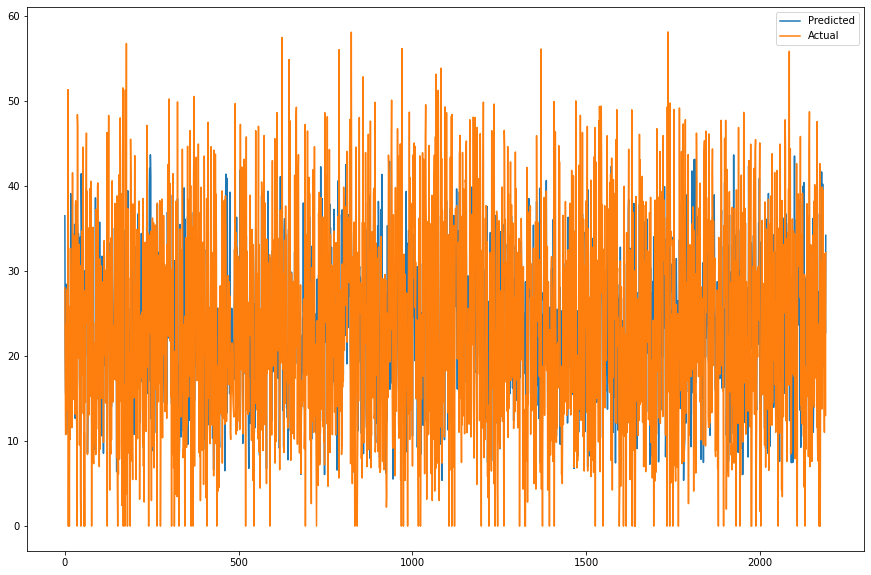

In [75]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

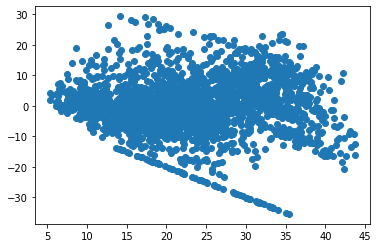

In [76]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

#### **3rd Model -Ridge (Regularization Model)**

In [77]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [78]:
# Fit the model
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [79]:
# check the score
ridge.score(X_train, y_train)

0.7572206057354925

In [80]:
# get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [81]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

# calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)

# calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


# import the packages
from sklearn.metrics import r2_score
# calculate R2 and adjusted R2 score
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 37.49872119173508
RMSE : 6.123619941810161
MAE : 4.632035255522214
R2 : 0.7572206057354925
Adjusted R2 : 0.7524713115766154


Looks like our r2 score value is 0.757 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare later.

In [82]:
# storing the test set metrics value in a dataframe to compare later
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [83]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

# calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)

# calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 39.751795604679025
RMSE : 6.304902505564938
MAE : 4.780231222524114
R2 : 0.7462763060660882
Adjusted R2 : 0.7413129175494491


The r2_score for the test set is 0.746. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)

In [84]:
# storing the test set metrics value in a dataframe to compare later
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

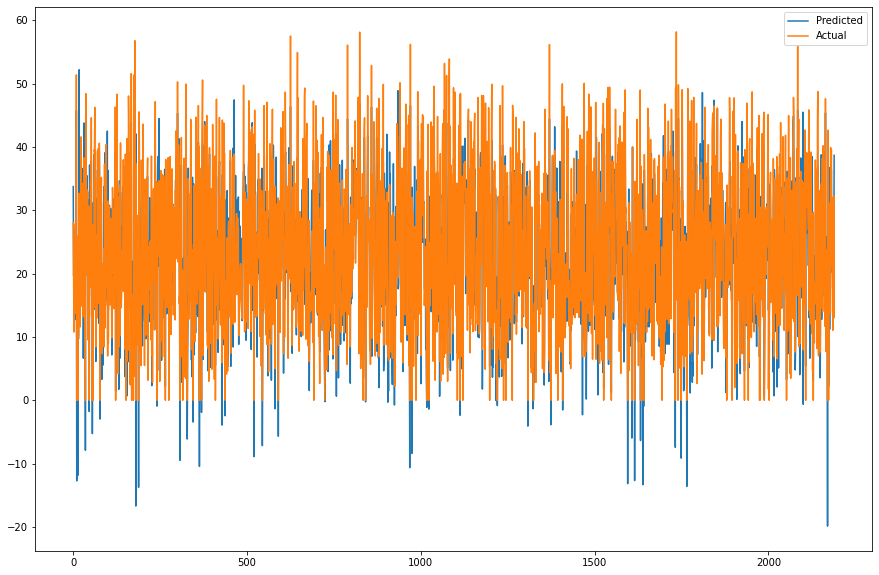

In [85]:
# Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

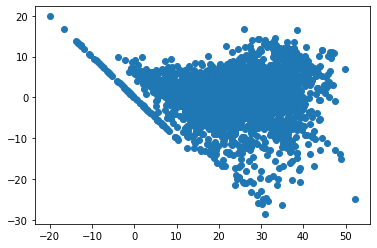

In [86]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

#### **4th Model -Elastic Net (Regularization Model)**

In [87]:
# import the packages
from sklearn.linear_model import ElasticNet
# a * L1 + b * L2
# alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [88]:
# Fit the model
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [89]:
# check the score
elasticnet.score(X_train, y_train)

0.6279010249947612

In [90]:
# get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [91]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

# calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)

# calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 57.47289946794181
RMSE : 7.581088277281951
MAE : 5.73828610026378
R2 : 0.6279010249947612
Adjusted R2 : 0.6206219579476164


Looks like our r2 score value is 0.627 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare it later.

In [92]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),2),
       'MSE':round((MSE_e),2),
       'RMSE':round((RMSE_e),2),
       'R2_score':round((r2_e),2),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [93]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

# calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)

# calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 58.48835705215875
RMSE : 7.647768109204067
MAE : 5.858671650946587
R2 : 0.6266864986181269
Adjusted R2 : 0.6193836727876478


The r2_score for the test set is 0.626. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [94]:
# storing the test set metrics value in a dataframe to compare it
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),2),
       'MSE':round((MSE_e),2),
       'RMSE':round((RMSE_e),2),
       'R2_score':round((r2_e),2),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

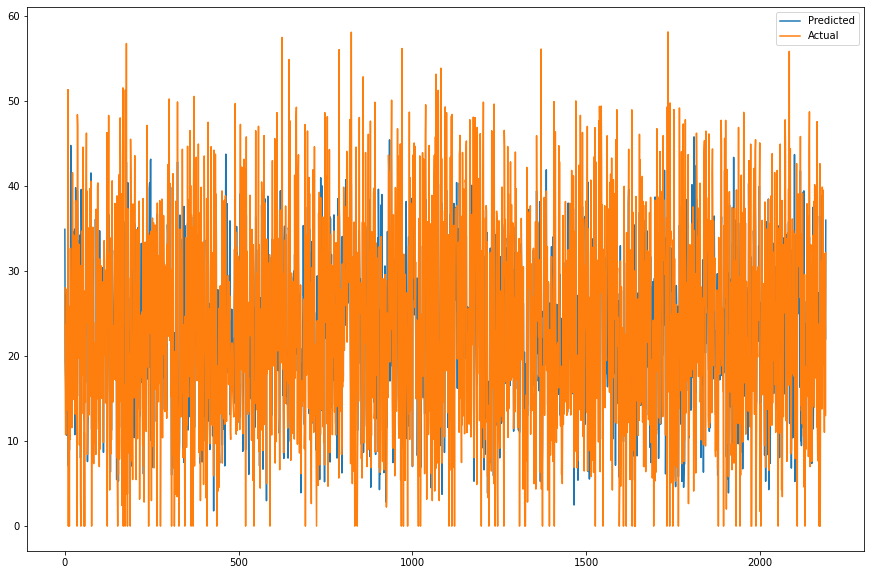

In [95]:
# Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

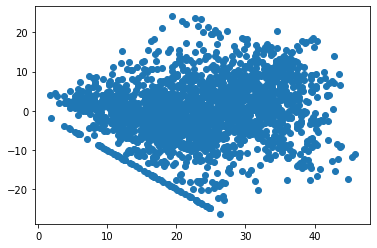

In [96]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

#### **5th Model - Decision Tree**

In [97]:
# import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [98]:
# get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [99]:
# import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

# calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

# calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)

# calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.7539975158631467
MSE : 37.99654658941822
RMSE : 6.164133888018513
MAE : 4.393482967584268
R2 : 0.7539975158631467
Adjusted R2 : 0.7491851710407211


Looks like our r2 score value is 0.733 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare it later.

In [100]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [101]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

# calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)

# calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 44.20954992364067
RMSE : 6.6490262387541135
MAE : 4.690179450691334
R2 : 0.7178238078769581
Adjusted R2 : 0.7123038264753896


The r2_score for the test set is 0.718. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)

In [102]:
# storing the test set metrics value in a dataframe to compare it later
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),2),
       'MSE':round((MSE_d),2),
       'RMSE':round((RMSE_d),2),
       'R2_score':round((r2_d),2),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

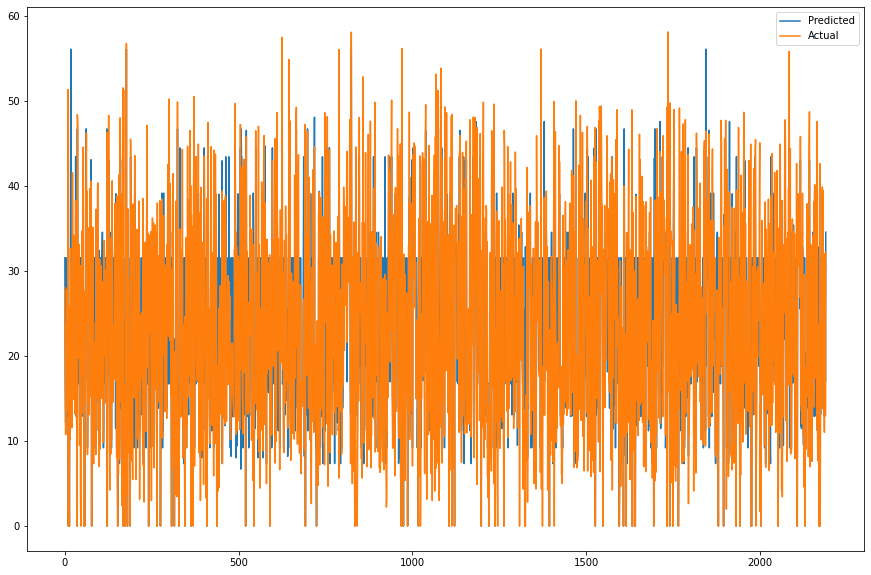

In [103]:
# Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

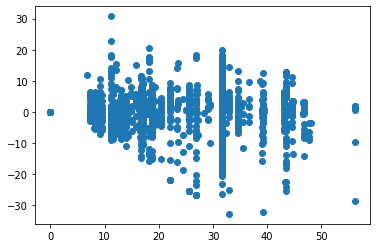

In [104]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

#### **6th Model - Random Forest**

In [105]:
# import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [106]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [107]:
# import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

# calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

# calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

# calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9880837626968861
MSE : 1.840533714311781
RMSE : 1.3566627120665553
MAE : 0.8230299812207165
R2 : 0.9880837626968861
Adjusted R2 : 0.9878506551203929


Looks like our r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare it later.

In [108]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),2),
       'MSE':round((MSE_rf),2),
       'RMSE':round((RMSE_rf),2),
       'R2_score':round((r2_rf),2),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [109]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

# calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

# calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.314174772701795
RMSE : 3.509155849018649
MAE : 2.176985828883402
R2 : 0.9214023451380916
Adjusted R2 : 0.9198648036829449


The r2_score for the test set is 0.922. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).


In [110]:
# storing the test set metrics value in a dataframe to compare it later
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),2),
       'MSE':round((MSE_rf),2),
       'RMSE':round((RMSE_rf),2),
       'R2_score':round((r2_rf),2),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

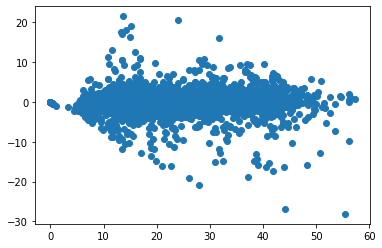

In [111]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [112]:
rf_model.feature_importances_

array([2.25381354e-01, 3.11604986e-01, 1.56505398e-01, 1.66362561e-02,
       3.48425987e-02, 1.56714369e-01, 1.78750389e-02, 2.32797972e-02,
       1.46744366e-04, 1.82707922e-04, 1.87800027e-03, 1.14362174e-03,
       1.19676351e-03, 2.95372849e-03, 8.15123253e-04, 2.09529158e-03,
       1.40924921e-03, 2.14843372e-03, 8.25473929e-03, 3.61553024e-04,
       3.18928132e-04, 1.02842673e-03, 6.03725927e-04, 5.55517396e-04,
       5.73898364e-04, 1.21964194e-03, 1.58994590e-03, 1.16469858e-02,
       4.18967167e-04, 9.18838009e-04, 2.93283152e-04, 3.05652436e-04,
       1.53358594e-04, 1.91137153e-04, 4.28805195e-04, 8.62807038e-04,
       1.01276940e-03, 9.56860139e-03, 1.05215155e-03, 6.31329140e-04,
       7.13485956e-04, 4.85990111e-04])

In [113]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [114]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [115]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,temperature,0.31
0,hour,0.23
2,humidity,0.16
5,functioning_day,0.16
4,solar_radiation,0.03
3,visibility,0.02
6,month,0.02
7,weekend,0.02
27,hour_8,0.01
37,hour_18,0.01


In [116]:
# FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [117]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

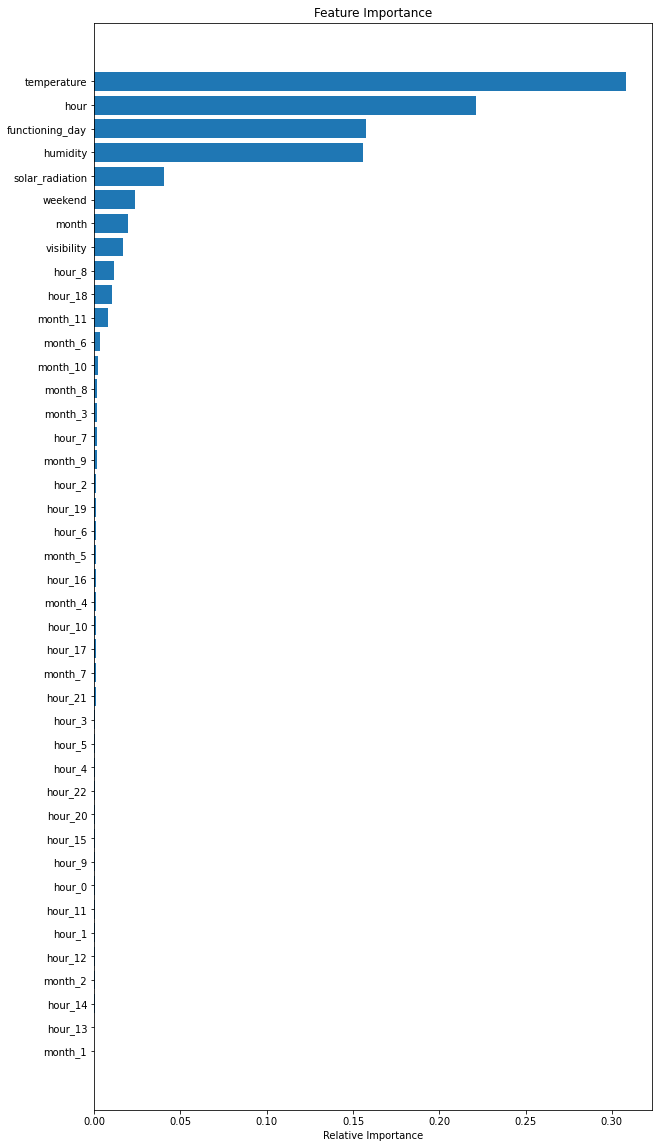

In [118]:
# Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### **7th Model - Gradient Boosting (Ensemble Method)**

In [119]:
# import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [120]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [121]:
# import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
# calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

# calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)

# calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8943871545179984
MSE : 16.312532037544283
RMSE : 4.038877571497344
MAE : 2.854101599692672
R2 : 0.8943871545179984
Adjusted R2 : 0.8923211370469951


Looks like our r2 score value is 0.894 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare it later.

In [122]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [123]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

# calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)

# calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 18.088279571260095
RMSE : 4.2530318093402615
MAE : 3.0709811628901464
R2 : 0.8845479797851138
Adjusted R2 : 0.8822894866090425


The r2_score for the test set is 0.884. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)

In [124]:
# storing the test set metrics value in a dataframe to compare it later
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

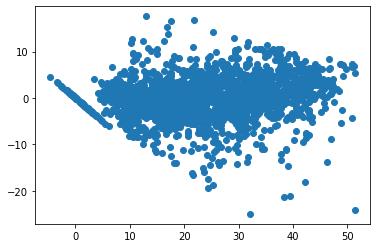

In [125]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

In [126]:
gb_model.feature_importances_

array([2.13102477e-01, 3.20070987e-01, 1.50574303e-01, 1.91370087e-03,
       3.62643715e-02, 1.83237729e-01, 2.05365286e-02, 1.88063821e-02,
       0.00000000e+00, 1.10463629e-04, 3.13943455e-04, 0.00000000e+00,
       3.41013448e-04, 4.12161397e-03, 5.51676228e-04, 2.53306152e-03,
       0.00000000e+00, 3.90493835e-03, 9.91775349e-03, 7.21848621e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.74722879e-03,
       2.17936913e-03, 6.12613324e-04, 5.73411578e-04, 1.28526788e-02,
       0.00000000e+00, 1.57327413e-03, 7.41551729e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.14569556e-02, 2.40126385e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [127]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [128]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [129]:
importance_df.head()

,Feature,Feature Importance
0,hour,0.21
1,temperature,0.32
2,humidity,0.15
3,visibility,0.00
4,solar_radiation,0.04


In [130]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,temperature,0.32
0,hour,0.21
5,functioning_day,0.18
2,humidity,0.15
4,solar_radiation,0.04
6,month,0.02
7,weekend,0.02
27,hour_8,0.01
37,hour_18,0.01
18,month_11,0.01


In [131]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [132]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

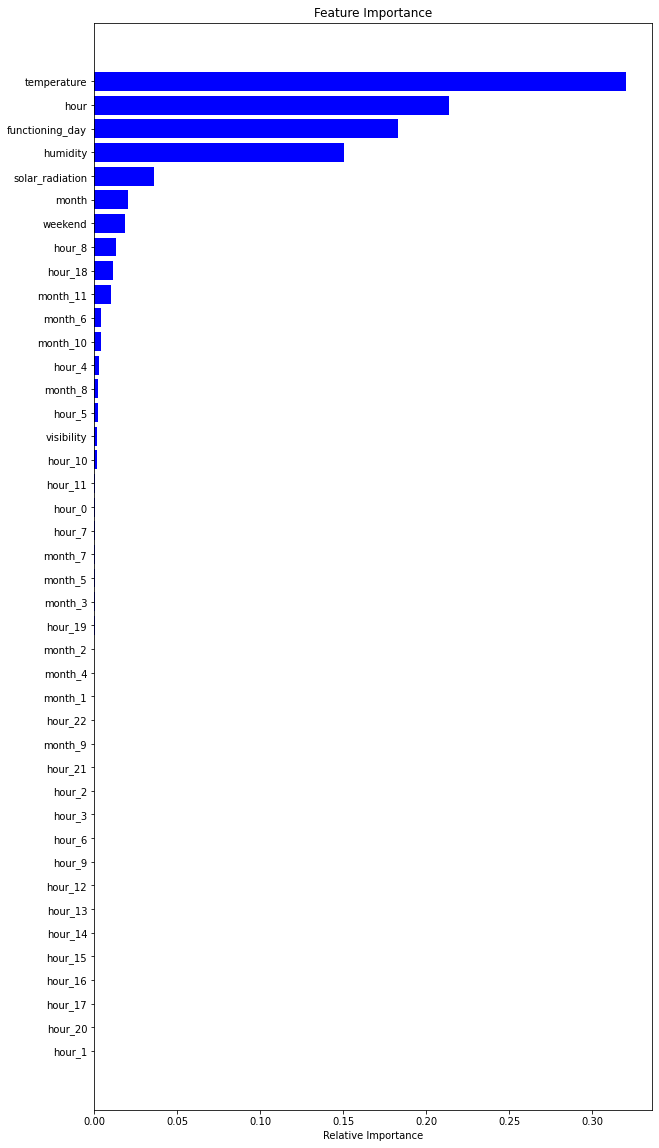

In [133]:
# Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### **8th Model Gradient Boosting Regressor with GridSearchCV**

##### Hyperparameter tuning

Let's try adjusting some hyperparameters to see if our model performs better before moving on to the next models.

The process of selecting the best hyperparameters for a learning algorithm is known as hyperparameter tuning. A model argument is a hyperparameter whose value is set before learning begins. Hyperparameter tuning is the key to machine learning algorithmic success.

##### Using GridSearch CV

GridSearch CV makes it easier to fit the model to the training set by looping through predefined hyperparameters. Thus, in the end, we can select the optimal hyperparameters from the list.

##### Provide the range of values for chosen hyperparameter

In [134]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [135]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_sam

In [ ]:
gb_grid.best_estimator_

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

In [ ]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

In [ ]:
gb_optimal_model.feature_importances_

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
gb_model.fit(X_train,y_train)

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
# Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **8. Final Verdict**

#### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The R square is calculated by replacing the calculated prediction with the mean by dividing the sum of the squared prediction error by the total sum of the squares. The R Square worth reaches from 0 to 1, and a higher worth shows that the forecast and genuine worth are all the more firmly adjusted.


The fit of the model to the dependent variables can be evaluated using the R square measure. On the other hand, overfitting is not taken into consideration. If there are a lot of independent variables in the regression model, it may work well with training data but fail with testing data because it is too complicated. Adjusted R Square is a new metric that penalizes additional independent variables added to the model and adjusts the metric to prevent overfitting.

Because it estimates the relationship between the movements of a dependent variable and those of an independent variable, R square is the best evaluation method for predicting the rented_bike_count. 

#### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the Random Forest model because, first and foremost, I need a better prediction for the number of rented bikes, and time is not a constraint because the data is different from that of Zomato or Uber, where real-time booking must be completed more quickly. As a result, various linear models, decision trees, Random Forest, and Gradient Boost techniques were used to improve accuracy. I would like to compare their evaluation metrics, which are provided here.

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'], axis =1)
result

For the following reasons, I would choose Random Forest.
* One of the best R2 scores for the Test Set (0.92) and the Training Set (0.99)
* Test RMSE and training RMSE were the lowest.
* Test MAE and Training MAE are the lowest.
* A single model that can be used on both business days and weekends.
* Lowest Overfit (the Train RMSE is more comparable to the Test RMSE).
* Lesser opportunity to prepare because of a lesser number of elements.
* Random Forest takes less time to train and test than Gradient Boosting with GridSearch CV, a good model, but Gradient Boosting with GridSearch CV takes more time to train.

#### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
# package used to calculate Shap values
import shap 

# Create object that can calculate shap values
explainer = shap.Explainer(rf_model)

# Calculate Shap values
shap_values = explainer(X_test)

A force plot is one way to show SHAP values visually. These provide us with information comparable to that of a waterfall plot depicting the contribution of the geological features and their relationship to one another in a straight line. Assuming one worth of builds res will pack. As you can see, our starting point is the same, which is -1.94.

Individual predictions can be easily interpreted using force and waterfall plots. We need to combine the SHAP values to comprehend how our model generally makes predictions. Using a decision plot is one way to accomplish this. The code that was used to generate the decision plot for the first ten abalones is shown above.

The plot has ten lines, one for each abalone, as can be seen. They all end with their final predicted number of rings and begin with the same base value of -1.94. The SHAP value for each feature indicates the movement on the x-axis as you ascend from that feature on the y-axis. In the end, this provides the same data as a waterfall plot, with the exception that we can now see it for multiple observations.

We can already observe some trends with only ten observations. For instance, some of the lines appear to zigzag at the chart's top. The prediction for these observations is positive (SHAP) for the shucked weight and negative (SHAP) for the shell weight and whole weight. To put it another way, the prediction is affected in different ways by these features. At the point when we take a gander at plot 5 — beeswarm, we will see that this is the situation for the model overall.

An issue with this outline is that we can't utilize it to picture all the SHAP values immediately. It will become too cluttered as the number of observations increases, making it difficult to comprehend the model's operation. We can only explain the SHAP values for a small number of observations.

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values)

A mean SHAP plot is yet another approach to aggregating the values. We find the mean of all observations' absolute SHAP values for each feature. We accept the outright qualities as we don't maintain that positive and negative qualities should balance one another. The bar graph above is what we have at the end. We can see that the feature with the largest mean SHAP, shell weight, is represented by a single bar.

Positive and negative SHAP values for features with large mean SHAP values will typically be large. To put it another way, these are the characteristics that significantly influence the predictions made by the model. This plot can be used in the same way that a feature importance plot can be used. That is, to emphasize characteristics that are crucial to a model's predictions. The fact that it reveals nothing about the nature of the relationship between the target variable and features is a problem.

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

The beeswarm plot is our final grouping. As found in Figure, this is a plot of all the SHAP values. The y-axis features are used to group the values. For each gathering, the shade the not entirely settled by the worth of a similar element (for example higher element values are redder). The mean SHAP values determine the order of the features.

Some of the problems from the previous plots are addressed in this one. Dissimilar to the choice plot, we can plot every one of the perceptions yet has clear translations. It can be used to emphasize important relationships, like mean SHAP. We can also begin to comprehend these relationships' nature. Take, for instance, Day_1call_duration, where you can see that the SHAP values rise in tandem with the feature value.

##**9. Summary and Conclusion**

#### **Summary**

We began our analysis by performing EDA on all of our datasets. First, we looked at and changed our dependent variable, "Rental Bike Count." After that, we looked at categorical variables and eliminated those that represented the majority of one class. We also looked at numerical variables and discovered their correlation, distribution, and connection to the dependent variable. Additionally, we hot-encoded the categorical variables and removed some numerical features that primarily had 0 values.

Following that, we examine several well-known individual models, ranging from straightforward ensemble models like Random Forest and Gradient Boost to more complex ones like the Linear Regressor and Regularization Models (Ridge and Lasso). A single, unified model for working and nonworking days was also one of the few model formulation options tested.

Linear Regression, Lasso, Ridge, Elastic net, Decision Tree, Random Forest, and XGBoost were the next eight machine learning algorithms we used. To enhance the performance of our model, we performed hyperparameter tuning.

####**Conclusion**

1. Here are some solutions to manage Bike Sharing Demand ⏬

* Create a portfolio of regular customers.
* The majority of rentals are for daily commutes to workplaces and colleges. Therefore open additional stations near these landmarks to reach their primary customers.
* While planning for extra bikes to stations the peak rental hours must be considered, i.e. 7–9 am and 5–6 pm.
* Start a new renting program for premium customers to increase business.
* Utilize the ML model to cater to demand efficiently.
* Be ready for 2 kinds of patterns in demand which are for a working day and a non- working day.
*  Maintenance activities for bikes should be done at night due to low usage of bikes during the night time. Removing some bikes from the streets at night time will not cause trouble for the customers.
* Try to get the bookings as early as possible to manage the demand.
* May start giving discounts to bookings if they book bike in advance.
* Be proactive with communication. Ask for feedback often.
* Periodically throw Offers to retain customers.
* Look at the customers facing problems with the service.
* Lean into the best customers.
* Solving Poor Network Connectivity Issues.
* Define a roadmap for new customers.
* Stay competitive.

2. We see 2 rental patterns across the day in bike rentals count - first for a Working Day where the rental count is high at peak office hours (8 am and 5 pm) and the second for a Non-working day where the rental count is more or less uniform across the day with a peak at around noon.
3. Hour of the day: Bike rental count is mostly correlated with the time of the day. As indicated above, the count reaches a high point during peak hours on a working day and is mostly uniform during the day on a non-working day.
4. Temperature: People generally prefer to bike at moderate to high temperatures. We see the highest rental counts between 32 to 36 degrees Celcius
5. Season: We see the highest number of bike rentals in the Spring (July to September) and Summer (April to June) Seasons and the lowest in the Winter (January to March) season.
6. Weather: As one would expect, we see the highest number of bike rentals on a clear day and the lowest on a snowy or rainy day
7. Humidity: With increasing humidity, we see a decrease in the bike rental count.
8. I have chosen the Random Forest model which is above all else I want better expectations for the rented_bike_count and time isn't compelling here. As a result, various linear models, decision trees, Random Forests, and Gradient Boost techniques were used to improve accuracy. I compared R2 metrics to choose a model.
9. No overfitting is seen in our model.
10. Due to less no. of data in the dataset, the training R2 score is around 99% and the test R2 score is 92%. Once we get more data we can retrain our algorithm for better performance.

#### **Way Forward**

However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.

### ***Hurrah! We have successfully completed our Machine Learning Capstone Project !!!***